cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


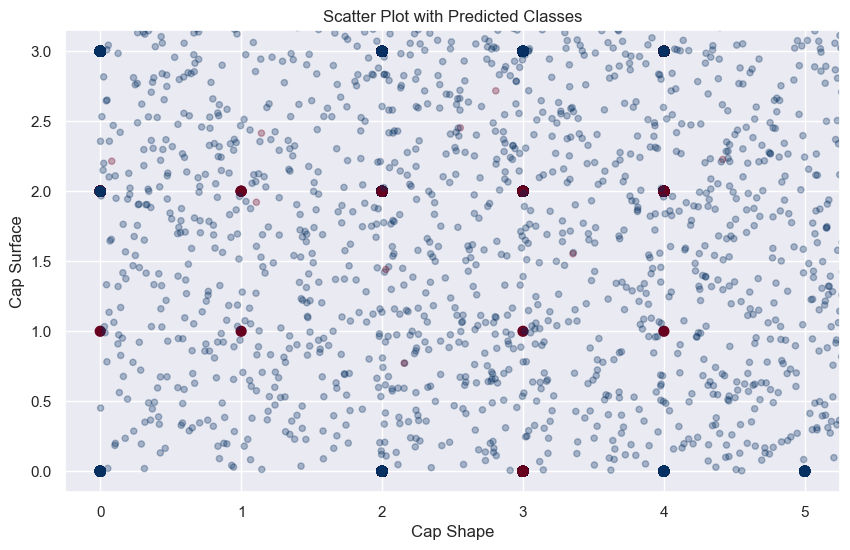

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3916
           1       0.89      0.90      0.89      4208

    accuracy                           0.89      8124
   macro avg       0.89      0.89      0.89      8124
weighted avg       0.89      0.89      0.89      8124



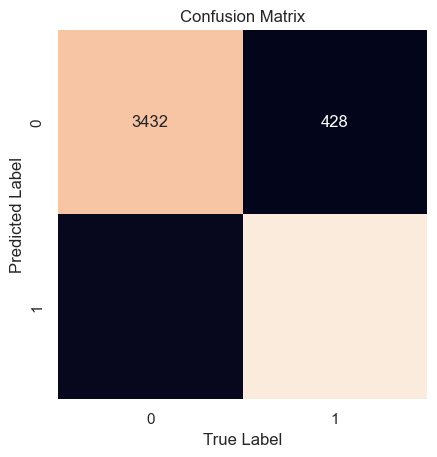

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

# Load the data
data = pd.read_csv('./mushrooms.csv')

# Replace categorical values with numerical values
replace_dict = {
    'cap-shape': {'b': 0, 'c': 1, 'x': 2, 'f': 3, 'k': 4, 's': 5},
    'cap-surface': {'f': 0, 'g': 1, 'y': 2, 's': 3},
    'cap-color': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9},
    'bruises': {'t': 0, 'f': 1},
    'odor': {'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8},
    'gill-attachment': {'a': 0, 'd': 1, 'f': 2, 'n': 3},
    'gill-spacing': {'c': 0, 'w': 1, 'd': 2},
    'gill-size': {'b': 0, 'n': 1},
    'gill-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'g': 4, 'r': 5, 'o': 6, 'p': 7, 'u': 8, 'e': 9, 'w': 10, 'y': 11},
    'stalk-shape': {'e': 0, 't': 1},
    'stalk-root': {'b': 0, 'c': 1, 'u': 2, 'e': 3, 'z': 4, 'r': 5, '?': 6},
    'stalk-surface-above-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-surface-below-ring': {'f': 0, 'y': 1, 'k': 2, 's': 3},
    'stalk-color-above-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'stalk-color-below-ring': {'n': 0, 'b': 1, 'c': 2, 'g': 3, 'o': 4, 'p': 5, 'e': 6, 'w': 7, 'y': 8},
    'veil-type': {'p': 0, 'u': 1},
    'veil-color': {'n': 0, 'o': 1, 'w': 2, 'y': 3},
    'ring-number': {'n': 0, 'o': 1, 't': 2},
    'ring-type': {'c': 0, 'e': 1, 'f': 2, 'l': 3, 'n': 4, 'p': 5, 's': 6, 'z': 7},
    'spore-print-color': {'k': 0, 'n': 1, 'b': 2, 'h': 3, 'r': 4, 'o': 5, 'u': 6, 'w': 7, 'y': 8},
    'population': {'a': 0, 'c': 1, 'n': 2, 's': 3, 'v': 4, 'y': 5},
    'habitat': {'g': 0, 'l': 1, 'm': 2, 'p': 3, 'u': 4, 'w': 5, 'd': 6},
    'class': {'p': 0, 'e': 1}
}

data.replace(replace_dict, inplace=True)

# Define X and y with all the relevant features
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
          'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 
          'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 
          'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
          'spore-print-color', 'population', 'habitat']]
y = data['class']

# Check data types to ensure all are numerical
print(X.dtypes)

# Build and fit the model
model = GaussianNB()
model.fit(X, y)

# Generate new random data for predictions
rng = np.random.RandomState(0)
Xnew = 10 * rng.rand(8124, len(X.columns))

# Predict with the model
ynew = model.predict(Xnew)
plt.figure(figsize=(10, 6))
plt.scatter(X['cap-shape'], X['cap-surface'], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.3)
plt.axis(lim)
plt.xlabel('Cap Shape')
plt.ylabel('Cap Surface')
plt.title('Scatter Plot with Predicted Classes')
plt.show()

# Predict probabilities
yprob = model.predict_proba(Xnew)  # predicting probabilities for each label
print(yprob[0:10].round(2))

# Show accuracy 
print(metrics.classification_report(y, model.predict(X)))

# Print the confusion matrix
mat = confusion_matrix(y, model.predict(X))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()